## Importing Libraries and Modules¶

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from PIL import Image
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


## Visualisation of Different Clothing Items in the Dataset

In [2]:
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

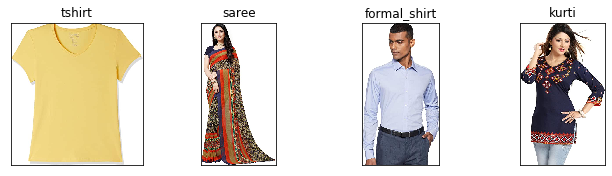

In [3]:
dir = 'dataset/'
folders = os.listdir(dir)
photos = [dir + '/' + folder for folder in folders]

all_images = []
for i in range(len(photos)):
    all_images.append(os.listdir(photos[i])[0])

images = []
for i in range(len(photos)):
    images.append(photos[i] + "/" + all_images[i])
    
images = np.array([cv2.imread(image)[...,::-1] for image in images])
names = [name for name in folders]
plot_portraits(images, names, 256, 256, n_row=1, n_col=4)

## Reading and Preparing Data

In [4]:
def prepare_data(path):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    i=1
    j=0
    for folder in os.listdir(path):
        for file in os.listdir(path + folder):
            image = cv2.imread(os.path.join(path + folder, file))
            image = cv2.resize(image, (256,256), interpolation = cv2.INTER_AREA)
            if(i<5):
                X_train.append(image)
                y_train.append(j)
                i+=1
            else:
                X_test.append(image)
                y_test.append(j)
                i=1
        j+=1
    
    return X_train, y_train, X_test, y_test

## Model Building

In [5]:
model = Sequential()

model.add(Conv2D(filters=96, input_shape=(256,256,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

model.add(Flatten())

model.add(Dense(4096, input_shape=(256*256*3,)))
model.add(Activation('relu'))
# model.add(Dropout(0.4))

model.add(Dense(4096))
model.add(Activation('relu'))
# model.add(Dropout(0.4))

model.add(Dense(1000))
model.add(Activation('relu'))
# model.add(Dropout(0.4))

model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model Testing

In [6]:
DATASET_PATH = "dataset/"
X_train, y_train, X_test, y_test = prepare_data(DATASET_PATH)

In [7]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Train on 1580 samples, validate on 395 samples
Epoch 1/2
1580/1580 [==============================] - 136s 86ms/sample - loss: 89.5763 - accuracy: 0.2772 - val_loss: 1.3774 - val_accuracy: 0.3038
Epoch 2/2
1580/1580 [==============================] - 141s 89ms/sample - loss: 1.3720 - accuracy: 0.3082 - val_loss: 1.3644 - val_accuracy: 0.3063
